In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dicionário de dados

* **Popularidade da Música**: Variável resposta do problema, em que 0 é pouco popular e 100 é muito popular;
* **Nome da música**;
* **Nome do artista**;
* **Duração**: Duração da música, dada em milissegundos;
* **Data de Lançamento**: Data em que a música foi lançada no formato YYYY-MM-DD;
* **Danceability**: Descreve o quão dançável a música é com base na combinação de tempo, ritmo, força da batida e regularidade geral. (0 a 1);
* **Energia**: Medida (de 0 a 1) que representa a percepção de intensidade e velocidade da música. Relacionada ao timbre, cadência, entropia e volume;
* **Loudness**: Volume médio da música em decibels (dB);
* **Acousticness**: Confiança de 0 a 1 de que a música seja acústica;
* **Mode**: Presença de notas maiores ou menores na música. Notas maiores são representada por 1 e notas menores por 0;
* **Key**: Tom/afinação da música. Cada valor representa uma classe de notas, em que C=0, C#/Db = 1, D = 2 e assim sucessivamente;
* **Liveness**: Detecta a presença de audiência na gravação. Valores maiores que 0.8 indicam alta probabilidade da música ser ao vivo;
* **Speechiness**: Detecta a presença de palavras na música. Valores próximos de 1 indicam gravações com mais discurso, como poesia ou rap, enquanto valores próximos de 0;
* **Instrumentalness**: Quantifica a presença de vocais na música. Quanto mais próximo de 1, maior a probabilidade de que não haja conteúdo vocal na música;
* **Tempo**: A média do passo/ritmo da música, dada em batidas por minuto (BPM);
* **Valence**: Relacionada à positividade transmitida pela música. Canções alegres e eufóricas possuem valor próximo de 1, enquanto canções tristes e depressivas se aproximam do 0.

### Formulando perguntas que façam sentido ao problema:

* Há mais músicas populares ou não populares?
* Qual a relação entre a duração da música e sua popularidade?
* Quais são entre as correlações entre os atributos da música e sua popularidade?
* 

In [3]:
dados = pd.read_csv('tiktok.csv')
dados.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,playlist_name,duration_mins,genre
0,6kVuF2PYLuvl9T85XjNbaO,Lay It Down Gmix - Main,1Xfmvd48oOhEWkscWyEbh9,Lloyd,43C6GVlhXG4KfZuEbxty3r,302186,2011-01-01,28,0.597,0.800,...,0.3120,0.0461,0.0,0.1800,0.565,155.932,6kVuF2PYLuvl9T85XjNbaO,6kVuF2PYLuvl9T85XjNbaO,5.036433,TIKTOK DANCE
1,1RGIjMFMgJxkZHMDXVYzOJ,Bartender (feat. Akon),3aQeKQSyrW4qWr35idm0cy,T-Pain,6CrSEKCF4TYrbSIitegb3h,238800,2007-06-05,75,0.832,0.391,...,0.0628,0.0564,0.0,0.2240,0.436,104.961,1RGIjMFMgJxkZHMDXVYzOJ,1RGIjMFMgJxkZHMDXVYzOJ,3.980000,TIKTOK DANCE
2,1RGIjMFMgJxkZHMDXVYzOJ,Bartender (feat. Akon),3aQeKQSyrW4qWr35idm0cy,T-Pain,6CrSEKCF4TYrbSIitegb3h,238800,2007-06-05,75,0.832,0.391,...,0.0628,0.0564,0.0,0.2240,0.436,104.961,1RGIjMFMgJxkZHMDXVYzOJ,1RGIjMFMgJxkZHMDXVYzOJ,3.980000,TIKTOK DANCE
3,1dIWPXMX4kRHj6Dt2DStUQ,Chosen (feat. Ty Dolla $ign),4qXC0i02bSFstECuXP2ZpL,Blxst,7AwrgenNcTAJlJF3pKL0Qr,161684,2020-12-04,76,0.571,0.767,...,0.2870,0.3360,0.0,0.0809,0.605,93.421,1dIWPXMX4kRHj6Dt2DStUQ,1dIWPXMX4kRHj6Dt2DStUQ,2.694733,TIKTOK DANCE
4,4QVS8YCpK71R4FsxSMCjhP,Tie Me Down (with Elley Duhé),2ZRQcIgzPCVaT9XKhXZIzh,Gryffin,69t8rpgBN1ov5kCU6LDMuR,218295,2018-08-03,72,0.548,0.839,...,0.0644,0.1350,0.0,0.1020,0.314,98.932,4QVS8YCpK71R4FsxSMCjhP,4QVS8YCpK71R4FsxSMCjhP,3.638250,TIKTOK DANCE


In [10]:
# Retirando dados duplicados
dados_new = dados.drop_duplicates('track_id')
dados_new.describe()

,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins
count,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000
mean,194770.595225,50.539326,0.727608,0.637238,5.217978,-6.966714,0.590169,0.135926,0.211404,0.040459,0.180970,0.537752,120.992122,3.246177
std,60734.615079,24.731639,0.139193,0.181434,3.663910,2.997190,0.491872,0.127687,0.235720,0.152355,0.136853,0.236496,25.874275,1.012244
min,43426.000000,0.000000,0.150000,0.023700,0.000000,-26.888000,0.000000,0.023200,0.000010,0.000000,0.019300,0.033100,54.367000,0.723767
25%,155754.000000,35.000000,0.648000,0.516000,1.000000,-8.485750,0.000000,0.045400,0.029875,0.000000,0.093800,0.355000,100.904000,2.595900
50%,186088.000000,55.000000,0.743000,0.643000,5.000000,-6.459500,1.000000,0.079700,0.119000,0.000001,0.124000,0.537000,122.013500,3.101467
75%,222957.750000,70.000000,0.830000,0.775000,8.000000,-4.931000,1.000000,0.190000,0.306000,0.000428,0.233000,0.727000,134.982000,3.715962
max,716206.000000,100.000000,0.990000,0.999000,11.000000,1.077000,1.000000,0.911000,0.991000,0.962000,0.952000,0.998000,216.053000,11.936767


In [13]:
is_popular = lambda x: 'popular' if x >= 70 else 'not popular'

dados_new['is_popular'] = dados_new['popularity'].apply(is_popular)
dados_new.head()

/tmp/ipykernel_711/1789075178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_new['is_popular'] = dados_new['popularity'].apply(is_popular)


,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,playlist_name,duration_mins,genre,is_popular
0,6kVuF2PYLuvl9T85XjNbaO,Lay It Down Gmix - Main,1Xfmvd48oOhEWkscWyEbh9,Lloyd,43C6GVlhXG4KfZuEbxty3r,302186,2011-01-01,28,0.597,0.800,...,0.0461,0.000000,0.1800,0.565,155.932,6kVuF2PYLuvl9T85XjNbaO,6kVuF2PYLuvl9T85XjNbaO,5.036433,TIKTOK DANCE,not popular
1,1RGIjMFMgJxkZHMDXVYzOJ,Bartender (feat. Akon),3aQeKQSyrW4qWr35idm0cy,T-Pain,6CrSEKCF4TYrbSIitegb3h,238800,2007-06-05,75,0.832,0.391,...,0.0564,0.000000,0.2240,0.436,104.961,1RGIjMFMgJxkZHMDXVYzOJ,1RGIjMFMgJxkZHMDXVYzOJ,3.980000,TIKTOK DANCE,popular
3,1dIWPXMX4kRHj6Dt2DStUQ,Chosen (feat. Ty Dolla $ign),4qXC0i02bSFstECuXP2ZpL,Blxst,7AwrgenNcTAJlJF3pKL0Qr,161684,2020-12-04,76,0.571,0.767,...,0.3360,0.000000,0.0809,0.605,93.421,1dIWPXMX4kRHj6Dt2DStUQ,1dIWPXMX4kRHj6Dt2DStUQ,2.694733,TIKTOK DANCE,popular
4,4QVS8YCpK71R4FsxSMCjhP,Tie Me Down (with Elley Duhé),2ZRQcIgzPCVaT9XKhXZIzh,Gryffin,69t8rpgBN1ov5kCU6LDMuR,218295,2018-08-03,72,0.548,0.839,...,0.1350,0.000000,0.1020,0.314,98.932,4QVS8YCpK71R4FsxSMCjhP,4QVS8YCpK71R4FsxSMCjhP,3.638250,TIKTOK DANCE,popular
5,7BoobGhD4x5K96Me0hqC8Q,Build a Bitch,26cMerAxjx9GedFt0lMDjm,Bella Poarch,5YKqfiQdPYWJ0kZ5pttY5o,122772,2021-05-14,89,0.855,0.463,...,0.2170,0.000018,0.3470,0.866,102.931,7BoobGhD4x5K96Me0hqC8Q,7BoobGhD4x5K96Me0hqC8Q,2.046200,TIKTOK DANCE,popular


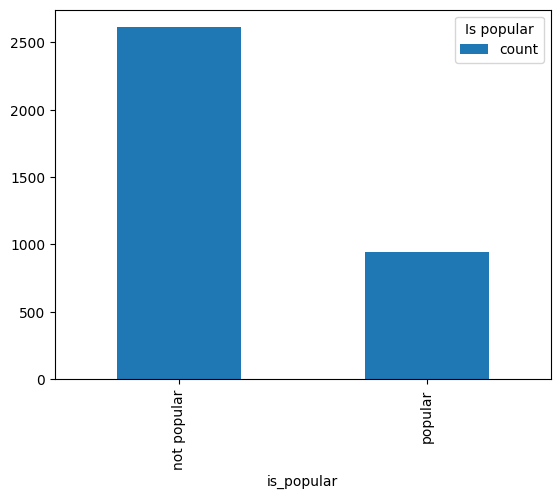

In [14]:
# Tabela de frequências absolutas
tab = pd.crosstab(index=dados_new['is_popular'],
                  columns='count')


# Gráfico de Barras
tab.plot.bar()
plt.legend(title='Is popular')

plt.show()

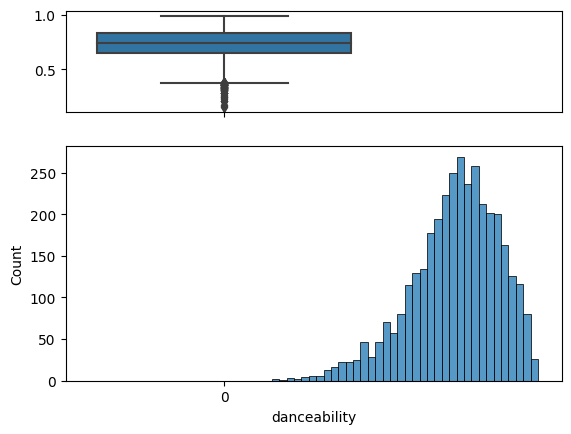

In [18]:
# Criando uma figura composta por boxplot e histograma
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.30, .70)})
 
# Inserindo cada figura em sua posição
sns.boxplot(dados_new['danceability'], ax=ax_box)
sns.histplot(data=dados_new, x="danceability", ax=ax_hist)
 
# Remove os axes do boxplot
ax_box.set(xlabel='')
plt.show()

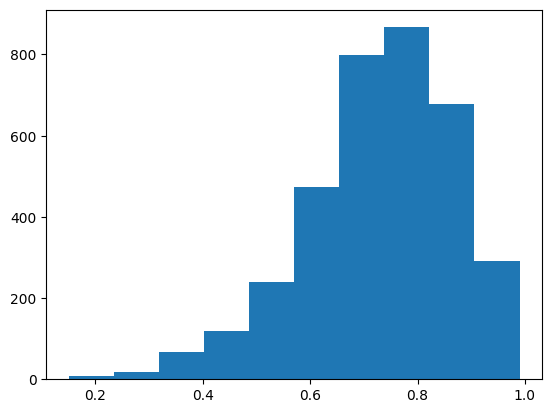

In [22]:
plt.hist(dados_new['danceability'])
plt.show()